In [58]:
#EXERCISE 1
import numpy as np 
import matplotlib.pyplot as plt

mu = 0.06
sigma = 0.2
years = 10
days = 365 
obs = years * days
x0 = 1


In [59]:

#the solution of the geometric brownian motion is given by the following
def price_fun(mu, sigma, delta, previous_x):
    return previous_x * np.exp( (mu - 0.5*sigma**2)*delta + sigma* (np.random.randn() *np.sqrt(delta)) )


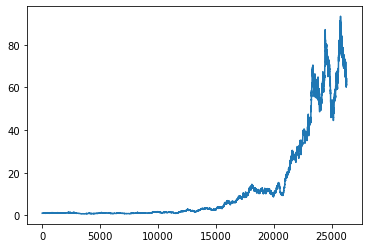

In [100]:
price = []

for i in range(0,obs):
    if i == 0:
        price.append(x0)
    else:
        price.append( price_fun(mu, sigma, (1/days), price[i-1]) ) 
    
plt.plot(price)
plt.show()

In [106]:
def simple_return(s):
    
    simple_returns = []
    for i in range(1,len(s)):
        simple_returns.append( (s[i] - s[i-1])/s[i-1] )       

    return simple_returns

def cont_return(s):
    cont_returns = []                          
    for R in simple_return(s):
        cont_returns.append( np.log(1+R) )
    return cont_returns
                              
simple_return(price)
cont_return(price)
            

[-0.00019174689308984214,
 0.00927784563727084,
 -0.0042648271872199415,
 -0.008889364026071574,
 0.0002733418204971396,
 0.01365999546166567,
 -0.0037818213640577157,
 0.006601996008462169,
 -0.0009384095968970147,
 0.00800077180262851,
 -0.0003406078789604512,
 0.017691500286848166,
 0.011610401689309277,
 0.0071293503122413044,
 0.00011259960568098715,
 -0.0013276478068316683,
 0.0064580982273605946,
 -0.003048366741447068,
 0.012286310739672013,
 -0.005601172525817671,
 -0.005028252693507405,
 0.006498781218084255,
 0.0026908634603486094,
 0.005386788175815935,
 -0.011970556454861335,
 0.014798185824504156,
 -0.004546708073927245,
 -0.009801423400546492,
 0.00028825270557770197,
 -0.00014095601376458295,
 -0.0047816435664268095,
 -0.0066788480203030616,
 0.00026722827842310163,
 0.006216777780444806,
 -0.007269329453517075,
 -0.004515076484455339,
 0.001567822379094235,
 0.0133489274039718,
 -0.0035185433977364317,
 0.0036213296215431524,
 -0.011955478699797684,
 0.0036512847770565

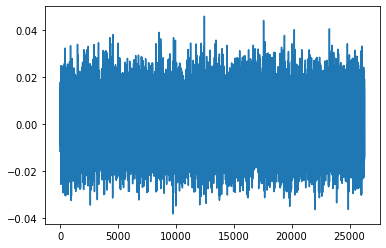

In [107]:
plt.plot(simple_return(price))
plt.show()

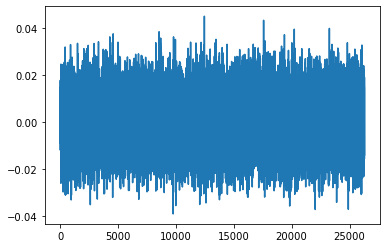

In [109]:
plt.plot(cont_return(price))
plt.show()

In [128]:
mean_daily = np.mean(cont_returns)
sd_daily = np.std(cont_returns)

print(f"Annualized return: {mean_daily*days}, Annualized standard deviation:  {sd_daily*np.sqrt(days)}")


Annualized return: 0.003014761044535625, Annualized standard deviation:  0.19967773916662068


In [87]:
#EXERCISE 2
  
import pandas as pd

start = "1950-01-01"
end = "2021-12-31"
calendar = pd.period_range(start, end, freq="D")

obs = len(calendar)


The number of observation is:  26298


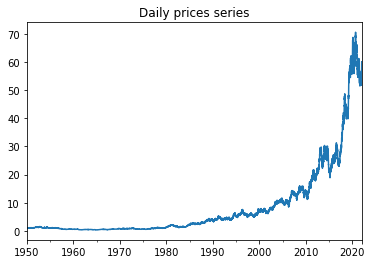

In [110]:
#simulating the price series
price = []

for i in range(0,obs):
    if i == 0:
        price.append(x0)
    else:
        price.append( price_fun(mu, sigma, (1/days), price[i-1]) ) 

#let's store the values in a series
price_series = pd.Series(price, calendar) 

#number of observation
print(f"The number of observation is:  {obs}")

#let's plot the series 
price_series.plot(title="Daily prices series")
plt.show()

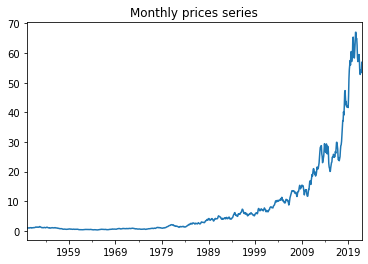

In [111]:
#creating the monthly prices series

monthly_prices = price_series.resample("M").mean()

#plot the path 

monthly_prices.plot(title = "Monthly prices series")
plt.show()

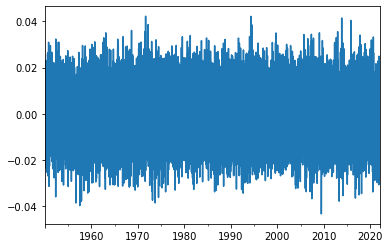

In [113]:
#EXERCISE 3
#we need to create daily log returns series

daily_log_ret_values = cont_return(price_series.values)

daily_log_ret = pd.Series(daily_log_ret_values, calendar[1:obs])

daily_log_ret.plot()
plt.show()


In [115]:
#monthly log returns are just the sum of log daily returns

monthly_log_ret = daily_log_ret.resample("M").sum()


In [119]:
#describing the two series 

print(f"Daily series\n{daily_log_ret.describe()}\n\nMonthly series\n{monthly_log_ret.describe()}")


#annualized mean and standard deviation



Daily series
count    26297.000000
mean         0.000154
std          0.010502
min         -0.043442
25%         -0.006923
50%          0.000265
75%          0.007239
max          0.042235
dtype: float64

Monthly series
count    864.000000
mean       0.004696
std        0.056455
min       -0.200220
25%       -0.032675
50%        0.005562
75%        0.039901
max        0.193634
dtype: float64


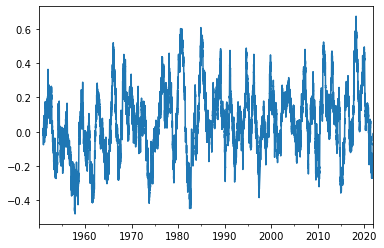

In [146]:
#use a rolling window to compute the annualized mean and standard deviations 

mean_from_d = daily_log_ret.rolling(365).mean()*365
mean_from_d.plot()
plt.show()



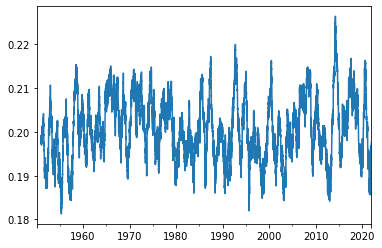

In [147]:

std_from_d = daily_log_ret.rolling(365).std() * np.sqrt(365) 
std_from_d.plot()
plt.show()


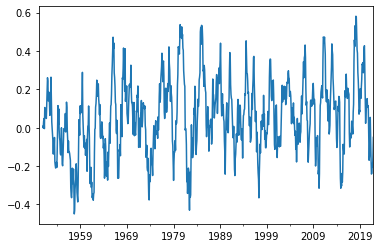

In [148]:

mean_from_m = monthly_log_ret.rolling(12).mean() * 12 
std_from_m = monthly_log_ret.rolling(12).std() * np.sqrt(12) 

mean_from_m.plot()
plt.show()

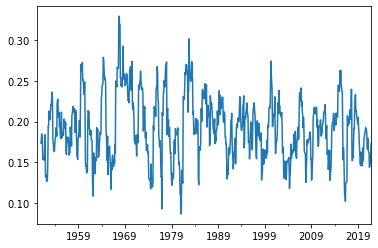

In [149]:
std_from_m.plot()
plt.show()